<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/HCA_phthalate_cocn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage

drive.mount('/content/drive', force_remount = True)

In [ ]:
Zafira_1_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_63_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Zafira_1_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_64_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Zafira_2_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_65_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Zafira_2_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_66_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Auto_1_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_130_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Auto_1_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_123_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Auto_2_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_144_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Auto_2_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Solvent_100ml_corrected/Sample_140_phthalate_concentration_2023-11-25.csv', header=1) #Blank solvent corrected
Auto_3_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_155_phthalate_concentration_2023-11-26.csv', header=1) #QC F4 corrected
Auto_3_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_162_phthalate_concentration_2023-11-26.csv', header=1) #QC pm corrected
Auto_4_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_170_phthalate_concentration_2023-11-28.csv', header=1) #QC F4 corrected
Auto_4_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_177_phthalate_concentration_2023-11-29.csv', header=1) #QC pm corrected
Auto_5_pm_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_183_phthalate_concentration_2023-12-01.csv', header=1) #QC pm corrected
Auto_5_gp_df = pd.read_csv('/content/drive/My Drive/conversion_export/Sample_185_phthalate_concentration_2023-12-05.csv', header=1) #QC pm corrected

Zafira_1_gp_df['Concentration [ng/m^3]'] = Zafira_1_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Zafira_1_pm_df['Concentration [ng/m^3]'] = Zafira_1_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Zafira_2_gp_df['Concentration [ng/m^3]'] = Zafira_2_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Zafira_2_pm_df['Concentration [ng/m^3]'] = Zafira_2_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_1_gp_df['Concentration [ng/m^3]'] = Auto_1_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_1_pm_df['Concentration [ng/m^3]'] = Auto_1_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_2_gp_df['Concentration [ng/m^3]'] = Auto_2_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_2_pm_df['Concentration [ng/m^3]'] = Auto_2_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_3_gp_df['Concentration [ng/m^3]'] = Auto_3_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_3_pm_df['Concentration [ng/m^3]'] = Auto_3_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_4_gp_df['Concentration [ng/m^3]'] = Auto_4_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_4_pm_df['Concentration [ng/m^3]'] = Auto_4_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_5_pm_df['Concentration [ng/m^3]'] = Auto_5_pm_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))
Auto_5_gp_df['Concentration [ng/m^3]'] = Auto_5_gp_df['Concentration [ng/m^3]'].apply(lambda x: max(0, x))



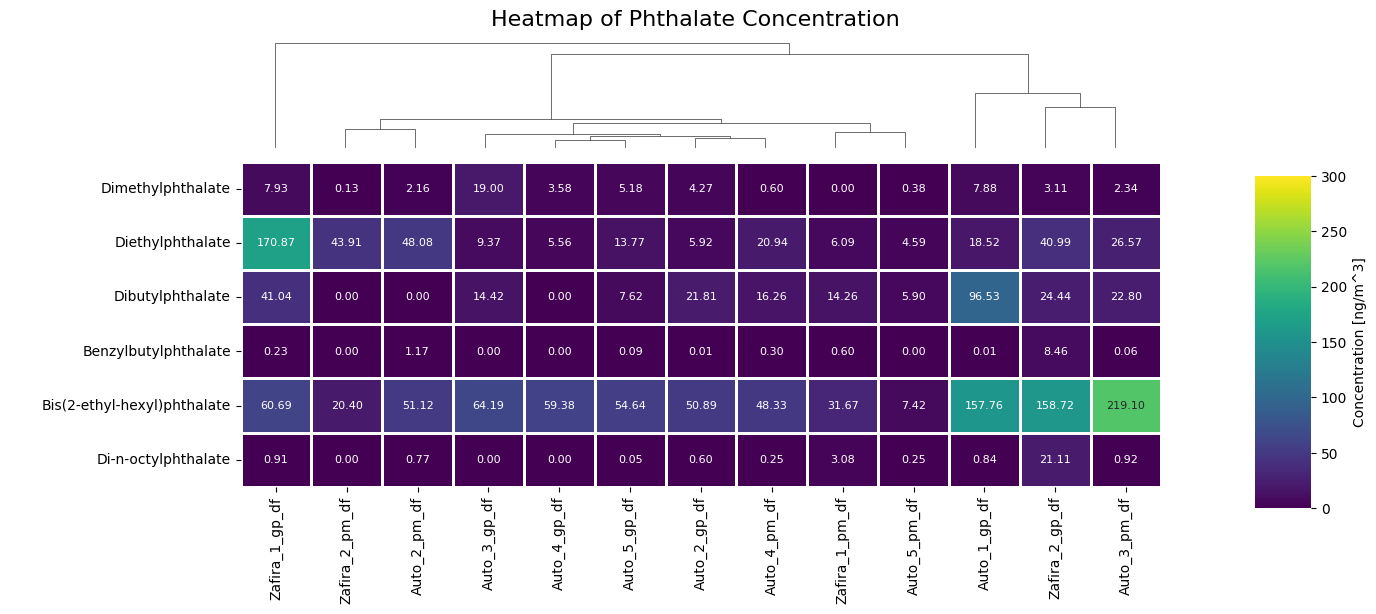

In [36]:
dfs = [Zafira_1_gp_df, Zafira_1_pm_df, Zafira_2_gp_df, Zafira_2_pm_df,
       Auto_1_gp_df, Auto_2_gp_df, Auto_2_pm_df,
       Auto_3_gp_df, Auto_3_pm_df, Auto_4_gp_df, Auto_4_pm_df,
       Auto_5_pm_df, Auto_5_gp_df]

# Manually specify the names for the x-axis labels
df_names = ['Zafira_1_gp_df', 'Zafira_1_pm_df', 'Zafira_2_gp_df', 'Zafira_2_pm_df',
            'Auto_1_gp_df', 'Auto_2_gp_df', 'Auto_2_pm_df',
            'Auto_3_gp_df', 'Auto_3_pm_df', 'Auto_4_gp_df', 'Auto_4_pm_df',
            'Auto_5_pm_df', 'Auto_5_gp_df']

# Create a single dataframe with a MultiIndex
df_concat = pd.concat({name: df.set_index('Phthalat:')['Concentration [ng/m^3]'] for name, df in zip(df_names, dfs)}, axis=1)

# Set desired aspect ratio (6:14)
aspect_ratio = 12 / 14

# Calculate the figure size based on the number of rows and columns in the dataframe
num_rows, num_cols = df_concat.shape
fig_width = 14  # You can adjust this value based on your preference
fig_height = fig_width * (num_rows / num_cols) * aspect_ratio

# Apply Hierarchical Clustering Analysis only to columns (x-axis)
clustered_data = sns.clustermap(df_concat, cmap='viridis', annot=True, fmt=".2f", linewidths=1,
                                cbar_kws={'label': 'Concentration [ng/m^3]'}, vmax=300,
                                col_cluster=True, row_cluster=False, figsize=(fig_width, fig_height), annot_kws={"size": 8})

# Move x-axis labels to the left
plt.setp(clustered_data.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
clustered_data.ax_heatmap.yaxis.tick_left()

# Move color bar to the right and center concentration scale
clustered_data.cax.yaxis.tick_right()
clustered_data.cax.set_position([0.9, 0.2, 0.04, 0.6])  # Adjust the position as needed

# Remove y-axis label
clustered_data.ax_heatmap.set(ylabel='')

# Adjust clustermap aesthetics to make the clustering lines more visible and move title up
clustered_data.ax_col_dendrogram.set_visible(True)
clustered_data.ax_col_dendrogram.set_position([0.175, 0.85, 0.65, 0.2])  # Adjust the position and height as needed
clustered_data.ax_col_dendrogram.yaxis.grid(False)  # Hide y-axis gridlines
clustered_data.ax_col_dendrogram.tick_params(axis='y', labelsize=8)  # Adjust y-axis tick label size


# Set title centered on top and move it up
plt.suptitle('Heatmap of Phthalate Concentration', fontsize=16, ha='center', y=1.1)

plt.show()


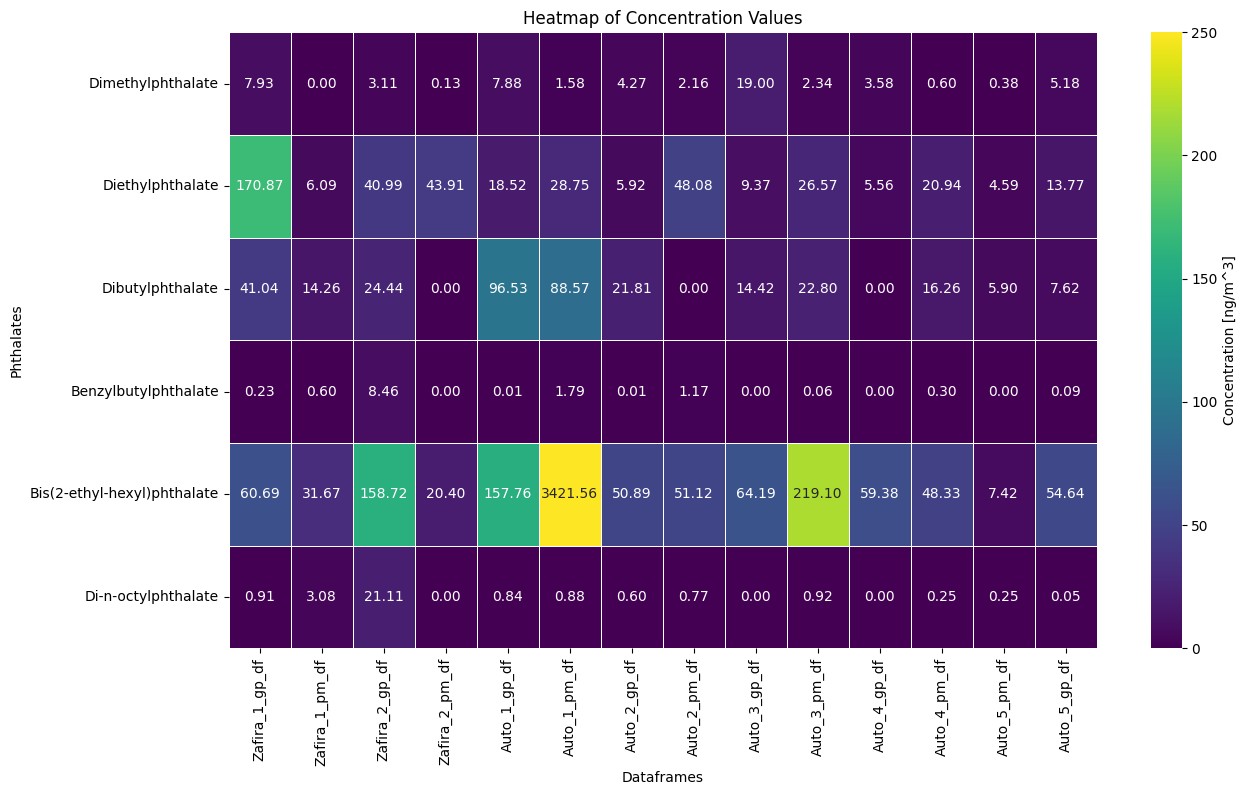

In [37]:
dfs = [Zafira_1_gp_df, Zafira_1_pm_df, Zafira_2_gp_df, Zafira_2_pm_df,
       Auto_1_gp_df, Auto_1_pm_df, Auto_2_gp_df, Auto_2_pm_df,
       Auto_3_gp_df, Auto_3_pm_df, Auto_4_gp_df, Auto_4_pm_df,
       Auto_5_pm_df, Auto_5_gp_df]

# Manually specify the names for the x-axis labels
df_names = ['Zafira_1_gp_df', 'Zafira_1_pm_df', 'Zafira_2_gp_df', 'Zafira_2_pm_df',
            'Auto_1_gp_df', 'Auto_1_pm_df', 'Auto_2_gp_df', 'Auto_2_pm_df',
            'Auto_3_gp_df', 'Auto_3_pm_df', 'Auto_4_gp_df', 'Auto_4_pm_df',
            'Auto_5_pm_df', 'Auto_5_gp_df']

# Create a single dataframe with a MultiIndex
df_concat = pd.concat({name: df.set_index('Phthalat:')['Concentration [ng/m^3]'] for name, df in zip(df_names, dfs)}, axis=1)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_concat, cmap='viridis', annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Concentration [ng/m^3]'}, vmax=250)
plt.title('Heatmap of Concentration Values')
plt.xlabel('Dataframes')
plt.ylabel('Phthalates')
plt.show()